<a href="https://colab.research.google.com/github/subhamyadav580/BlueBookforBulldozers/blob/main/Blue_Book_Bulldozers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Unzip the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/data/

/content/drive/My Drive/data


In [4]:
!ls

100100502_AES01267KY_ORG_Financial-Statement_2020.pdf
Blue_Book
bluebook-for-bulldozers.zip
data.csv
gender_submission.csv
insurance.csv
reviews_Cell_Phones_and_Accessories_5.json.gz
spam.csv
test.csv
tmp
train.csv
Wisdom


In [ ]:
!unzip "bluebook-for-bulldozers.zip" -d "Blue_Book/"

Archive:  bluebook-for-bulldozers.zip
  inflating: Blue_Book/Data Dictionary.xlsx  
  inflating: Blue_Book/Machine_Appendix.csv  
  inflating: Blue_Book/Test.csv      
  inflating: Blue_Book/Train.7z      
  inflating: Blue_Book/Train.zip     
  inflating: Blue_Book/TrainAndValid.7z  
  inflating: Blue_Book/TrainAndValid.csv  
  inflating: Blue_Book/TrainAndValid.zip  
  inflating: Blue_Book/Valid.7z      
  inflating: Blue_Book/Valid.csv     
  inflating: Blue_Book/Valid.zip     
  inflating: Blue_Book/ValidSolution.csv  
  inflating: Blue_Book/median_benchmark.csv  
  inflating: Blue_Book/random_forest_benchmark_test.csv  


In [ ]:
!unzip "Blue_Book/Train.zip" -d "Blue_Book/"

Archive:  Blue_Book/Train.zip
  inflating: Blue_Book/Train.csv     


## **Imports**

In [22]:
import pandas as pd
import numpy as np
# from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
import re
import os
import math
from sklearn import metrics, tree
import matplotlib.pyplot as plt


In [6]:
path = 'Blue_Book/'

In [ ]:
df_raw = pd.read_csv(f'{path}Train.csv', parse_dates=['saledate'], 
                     low_memory=False)

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [ ]:
(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [ ]:
df_raw.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

## **Initial Processing**

In [ ]:
def add_datepart(df, fldnames, drop=True, time=False, errors="raise"):
    if isinstance(fldnames,str): 
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
        if time: 
          attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr:
          if n == 'Week':
            df[targ_pre + n] = getattr(fld.dt.isocalendar(), n.lower())
          else:
            df[targ_pre + n] = getattr(fld.dt, n.lower())
        df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: 
          df.drop(fldname, axis=1, inplace=True)

In [ ]:
add_datepart(df_raw, 'saledate')

In [ ]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
          df[n] = c.astype('category').cat.as_ordered()

def apply_cats(df, trn):
    for n,c in df.items():
        if (n in trn.columns) and (trn[n].dtype.name=='category'):
            df[n] = c.astype('category').cat.as_ordered()
            df[n].cat.set_categories(trn[n].cat.categories, ordered=True, inplace=True)

In [ ]:
train_cats(df_raw)

In [ ]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [ ]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [ ]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

In [ ]:
display_all(df_raw.isnull().sum().sort_values(ascending=False)/len(df_raw))

Pushblock                   0.937129
Blade_Extension             0.937129
Blade_Width                 0.937129
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Tip_Control                 0.937129
Scarifier                   0.937102
Grouser_Tracks              0.891899
Hydraulics_Flow             0.891899
Coupler_System              0.891660
fiModelSeries               0.858129
Steering_Controls           0.827064
Differential_Type           0.826959
UsageBand                   0.826391
fiModelDescriptor           0.820707
Backhoe_Mounting            0.803872
Pad_Type                    0.802720
Stick                       0.802720
Turbocharged                0.802720
Blade_Type                  0.800977
Travel_Controls             0.800975
Tire_Size                   0.763869
Track_Type                  0.752813
Grouser_Type                0.752813
Stick_Length                0.752651
Pattern_Changer             0.752651
Thumb                       0.752476
U

In [ ]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/raw')

# **Pre-Processing**

In [7]:
df_raw = pd.read_feather('tmp/raw')

In [8]:
def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.
    Parameters:
    -----------
    df: A pandas data frame, that you wish to sample from.
    n: The number of rows you wish to sample.
    Returns:
    --------
    return value: A random sample of n rows of df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    >>> get_sample(df, 2)
       col1 col2
    1     2    b
    2     3    a
    """
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()
def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

def numericalize(df, col, name, max_n_cat):
   if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1
        
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds: 
      ignore_flds=[]
    if not skip_flds: 
      skip_flds=[]
    if subset: 
      df = get_sample(df,subset)
    else: 
      df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: 
      preproc_fn(df)
    if y_fld is None: 
      y = None
    else:
        if not is_numeric_dtype(df[y_fld]): 
          df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: 
      na_dict = {}
    else: 
      na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): 
      na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: 
      mapper = scale_vars(df, mapper)
    for n,c in df.items(): 
      numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: 
      res = res + [mapper]
    return res

In [9]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9881657586193039

In [12]:
def split_vals(a,n):
  return a[:n].copy(), a[n:].copy()

n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [13]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

In [14]:
def rmse(x, y):
  return math.sqrt(((x-y)**2).mean())


def print_score(m):
  res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid), m.score(X_train, y_train), m.score(X_valid, y_valid)]
  if hasattr(m, 'oob_score_'):
    res.append(m.oob_score_)
  print(res)


In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)    

CPU times: user 17min 3s, sys: 3.37 s, total: 17min 6s
Wall time: 8min 42s
[0.07566666560129685, 0.23572214320682047, 0.9880341372035875, 0.9007686873871201]


## **Speeding Up**

In [15]:
df_trn, y_trn, _ = proc_df(df_raw, 'SalePrice', subset=30000)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [17]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m) 

CPU times: user 36.6 s, sys: 57.1 ms, total: 36.7 s
Wall time: 18.7 s
[0.09484920741289786, 0.3610981200053884, 0.9802853662274836, 0.7671381042896231]


# **Hyper Parameters Tuning**

## **Bagging**

Its the technique of combining different models called as Ensembling

In [18]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m) 

CPU times: user 37.6 s, sys: 62.7 ms, total: 37.7 s
Wall time: 19.2 s
[0.09531482660250751, 0.3574844292952186, 0.9800913310135326, 0.7717755156272771]


We will grab the predictions for each individual tree, and look at one example

In scikit learn it takes n numbers of rows random with replacement and create a tree this process is called Bootstraping

In [19]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:, 0], np.mean(preds[:, 0]), y_valid[0]

(array([ 9.87816974,  9.35010231,  8.98719682,  9.10497986,  9.51044496,
         9.10497986,  9.54681261,  9.44145209,  8.98719682,  9.39266193,
         9.39266193,  8.9226583 ,  9.10497986,  9.04782144,  9.10497986,
         8.98719682,  8.98719682,  8.98719682,  9.10497986, 10.04324949,
         9.10497986,  8.9226583 ,  9.30565055,  9.21034037,  8.9226583 ,
         9.10497986,  9.10497986,  9.35010231,  9.71111566,  9.6485953 ,
         9.15904708,  8.98719682,  9.10497986,  9.51044496,  9.35010231,
         9.10497986,  9.39266193,  9.54681261,  9.61580548,  9.39266193,
         9.04782144,  9.21034037,  8.9226583 ,  9.15904708,  9.21034037,
         9.15904708,  9.51044496, 10.08580911,  8.98719682,  9.10497986,
        10.08580911,  9.15904708,  9.45328655,  9.6485953 ,  9.25913054,
         9.21034037,  9.21034037,  9.15904708,  9.10497986,  8.98719682,
         9.43348392,  9.21034037,  9.35010231,  9.82552601,  9.30565055,
         9.15904708,  9.21034037,  8.9226583 ,  9.7

In [20]:
preds.shape

(100, 12000)

Xtree regressor uses random number of variables each time whil creating trees. It also much faster than randomforest.
Uncorrelated trees are good.


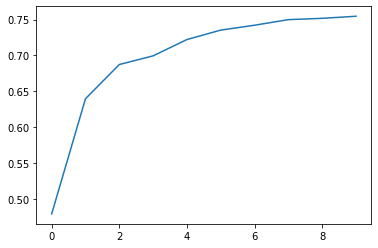

In [24]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])
plt.show()

## **Out of Bag Score**

In [25]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m) 

CPU times: user 38.8 s, sys: 64.2 ms, total: 38.9 s
Wall time: 20 s
[0.09492507305272384, 0.35273588157580316, 0.9802538159066533, 0.7777983631538391, 0.8567765823043193]
